In [1]:
import numpy as np
import matplotlib.pyplot as plt

#simulate regular bursting neurons
with internal Refractory period, Inter-burst interval, and delay between both neurons.  

In [ ]:

def simulate_regular_bursting_neurons(duration, firing_rate, burst_duration, refractory_period, delay, interburst_interval):
    dt = 1  # Time step size in ms
    num_steps = int(duration / dt)

    spike_train_1 = np.zeros(num_steps + int(refractory_period / dt))
    spike_train_2 = np.zeros(num_steps + int(refractory_period / dt))

    time = 0
    while time < duration:
        # Generate burst for neuron 1
        burst_start_1 = int(time / dt)
        burst_end_1 = burst_start_1 + int(burst_duration / dt)
        spike_train_1[burst_start_1:burst_end_1] = 1
        time += burst_duration + interburst_interval

        # Generate burst for neuron 2 with a delay
        burst_start_2 = burst_start_1 + int(delay / dt)
        burst_end_2 = burst_end_1 + int(delay / dt)
        spike_train_2[burst_start_2:burst_end_2] = 1

        # Apply refractory period after each spike
        spike_train_1[burst_end_1 + 1:burst_end_1 + int(refractory_period / dt) + 1] = 0
        spike_train_2[burst_end_2 + 1:burst_end_2 + int(refractory_period / dt) + 1] = 0

        spike_train_1[burst_end_1 + int(refractory_period / dt) + 1:burst_end_1 + int((refractory_period + burst_duration) / dt)] = 0
        spike_train_2[burst_end_2 + int(refractory_period / dt) + 1:burst_end_2 + int((refractory_period + burst_duration) / dt)] = 0

        time += refractory_period

    return spike_train_1, spike_train_2

In [ ]:
# Hyperparameters
duration = 1000  # Duration of the simulation in ms
firing_rate = 100  # Firing rate in Hz
burst_duration = 20  # Burst duration in ms
refractory_period = 2  # Refractory period in ms
delay = 30  # Delay between neuron 1 and neuron 2 in ms
interburst_interval = 100  # Inter-burst interval in ms

# Simulate regular bursting neurons
spike_train_1, spike_train_2 = simulate_regular_bursting_neurons(duration, firing_rate, burst_duration, refractory_period, delay, interburst_interval)



# Plot the CC of both neurons 

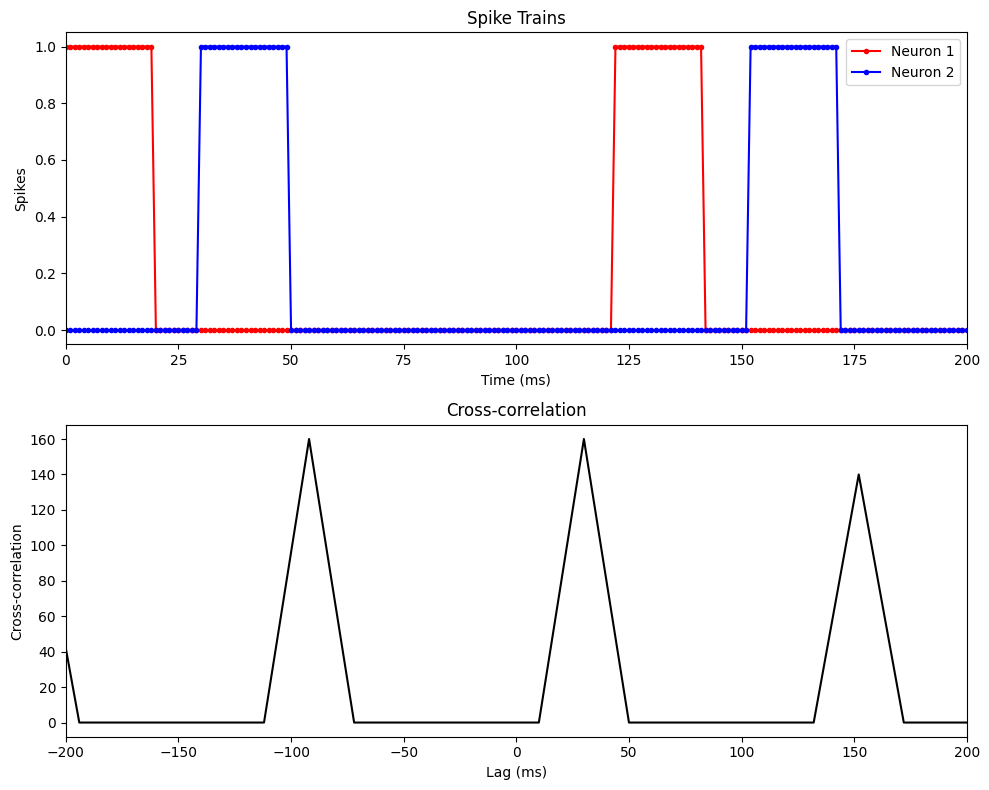

In [ ]:
# Calculate cross-correlation
cross_corr = np.correlate(spike_train_2,spike_train_1, mode='full')

# Time vector
time = np.arange(0, len(spike_train_1))
# Plotting
plt.figure(figsize=(10, 8))

# Spike trains
plt.subplot(2, 1, 1)
plt.plot(time, spike_train_1, 'r.-', label='Neuron 1')
plt.plot(time, spike_train_2, 'b.-', label='Neuron 2')
plt.xlabel('Time (ms)')
plt.ylabel('Spikes')
plt.title('Spike Trains')
plt.legend()
plt.xlim(0, 200)

# Cross-correlation
lag = np.arange(-len(spike_train_1) + 1, len(spike_train_1))
plt.subplot(2, 1, 2)
plt.plot(lag, cross_corr, 'k-')
plt.xlabel('Lag (ms)')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation')
plt.xlim(-200, 200)

plt.tight_layout()
plt.show()


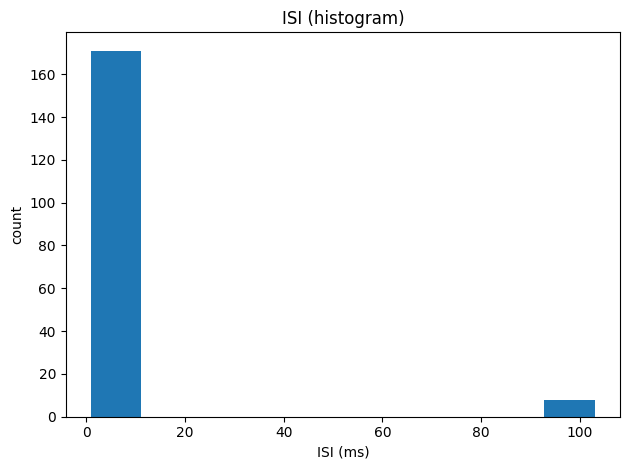

In [ ]:
# Calculate ISIs
isi_1 = np.diff(np.where(spike_train_1 == 1)[0]) 

# Plotting
#plt.figure(figsize=(8, 6))
#plt.subplot(2, 1, 1)
#plt.stem(isi_1, markerfmt='.', use_line_collection=True)
#plt.xlabel('Spike Index')
#plt.ylabel('ISI (ms)')
#plt.title('ISI valuse')

#plt.subplot(2, 1, 2)
plt.hist(isi_1)
plt.xlabel('ISI (ms)')
plt.ylabel('count')
plt.title('ISI (histogram)')

plt.tight_layout()
plt.show()

<ipython-input-3-d7ef70790f8c>:39: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(time, spike_train, use_line_collection=True)


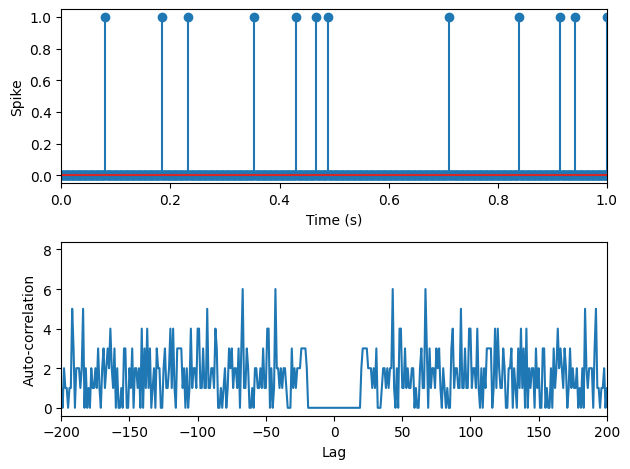

In [3]:
def poisson_spike_train(rate, duration, refractory_period):
    num_bins = int(duration * 1000)
    spike_train = np.zeros(num_bins)
    
    time = 0
    while time < duration:
        isi = np.random.exponential(scale=1.0/rate)
        if isi > refractory_period:
            bin_idx = int(time * 1000)
            if bin_idx < num_bins:
                spike_train[bin_idx] = 1
            time += isi
        else:
            time += refractory_period
    
    return spike_train

# Parameters
rate = 50  # Number of spikes per second
duration = 10  # Duration of the spike train in seconds
refractory_period = 0.02  # Refractory period in seconds

# Generate spike train
spike_train = poisson_spike_train(rate, duration, refractory_period)

# Perform auto-correlation
auto_corr = np.correlate(spike_train, spike_train, mode='full')
lags = np.arange(-len(spike_train)+1, len(spike_train))

# Remove lag at point 0
zero_index = len(spike_train) - 1
auto_corr = np.delete(auto_corr, zero_index)
lags = np.delete(lags, zero_index)

# Plot the spike train and auto-correlation
time = np.arange(0, duration, 1/1000)

plt.subplot(2, 1, 1)
plt.stem(time, spike_train, use_line_collection=True)
plt.xlabel('Time (s)')
plt.ylabel('Spike')
plt.xlim(0, 1)

plt.subplot(2, 1, 2)
plt.plot(lags, auto_corr)
plt.xlabel('Lag')
plt.ylabel('Auto-correlation')
plt.xlim(-200, 200)
plt.tight_layout()
plt.show()



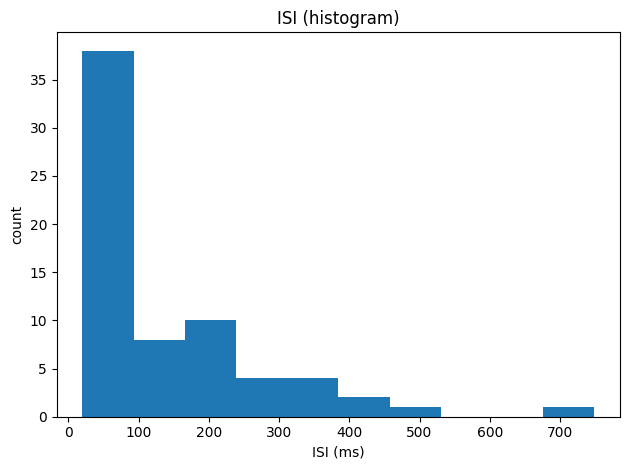

In [ ]:
# Calculate ISIs
isi_2 = np.diff(np.where(spike_train == 1)[0]) 

# Plotting
#plt.figure(figsize=(8, 6))
#plt.subplot(2, 1, 1)
#plt.stem(isi_2, markerfmt='.', use_line_collection=True)
#plt.xlabel('Spike Index')
#plt.ylabel('ISI (ms)')
#plt.title('ISI valuse')

#plt.subplot(2, 1, 2)
plt.hist(isi_2)
plt.xlabel('ISI (ms)')
plt.ylabel('count')
plt.title('ISI (histogram)')
#plt.xlim(0, 50)

plt.tight_layout()
plt.show()

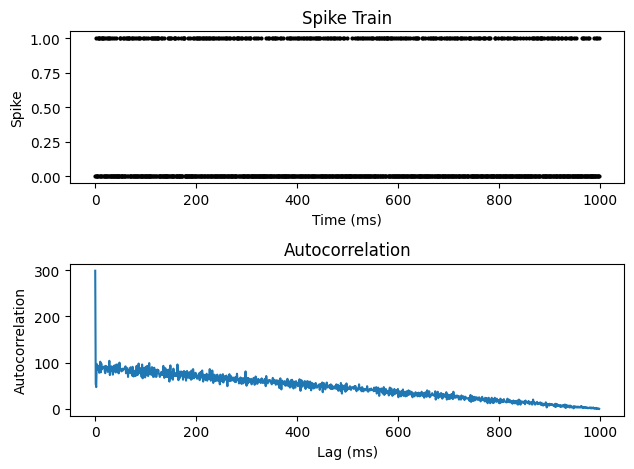

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def poisson_spike_train(rate, duration, refractory_period):
    dt = 1  # Time step size in ms
    num_steps = int(duration / dt)
    spike_train = np.zeros(num_steps)

    time = 0
    while time < duration:
        # Generate Poisson spikes
        spikes = np.random.rand(num_steps) < rate * dt / 1000

        # Apply refractory period after each spike
        for i in range(num_steps):
            if spikes[i] == 1:
                spike_train[i] = 1
                spike_train[max(i - int(refractory_period / dt), 0):i] = 0

        time += dt

    return spike_train

# Example usage
rate = 100  # Firing rate in Hz
duration = 1000  # Duration of spike train in ms
refractory_period = 2  # Refractory period in ms

# Generate spike train
spike_train = poisson_spike_train(rate, duration, refractory_period)

# Plot spike train
time = np.arange(0, duration)
plt.subplot(2, 1, 1)
plt.plot(time, spike_train, 'ko', markersize=2)
plt.xlabel('Time (ms)')
plt.ylabel('Spike')
plt.title('Spike Train')

# Calculate autocorrelation
autocorr = np.correlate(spike_train, spike_train, mode='full')
autocorr = autocorr[len(autocorr)//2:]  # Take only positive lags

# Plot autocorrelation
lag = np.arange(0, len(autocorr))
plt.subplot(2, 1, 2)
plt.plot(lag, autocorr)
plt.xlabel('Lag (ms)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation')

plt.tight_layout()
plt.show()
